# Quotes Analysis

Matplotlib is a Python library used for creating static, interactive, and animated
visualizations in Python. It offers a wide range of plotting functions for various types of
charts, including line plots, bar charts, histograms, scatter plots, and more. Matplotlib can
work seamlessly with Pandas

## Import Matploplib

In [1]:
import matplotlib.pyplot as plt

## Loading Data to Pandas

In [2]:
import pandas as pd
# Reading data from a CSV file into a DataFrame
quotes_df = pd.read_csv('quotes.csv')
authors_df = pd.read_csv('authors.csv')

In [3]:
quotes_df.head()

,id,author,quote,tags
0,1,Albert Einstein,“The world as we have created it is a process ...,"change,deep-thoughts,thinking,world"
1,2,J.K. Rowling,"“It is our choices, Harry, that show what we t...","abilities,choices"
2,3,Albert Einstein,“There are only two ways to live your life. On...,"inspirational,life,live,miracle,miracles"
3,4,Jane Austen,"“The person, be it gentleman or lady, who has ...","aliteracy,books,classic,humor"
4,5,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...","be-yourself,inspirational"


In [4]:
authors_df.head()

,author,born_date,born_location
0,Albert Einstein,"March 14, 1879","Ulm, Germany"
1,J.K. Rowling,"July 31, 1965","Yate, South Gloucestershire, England, The Unit..."
2,Jane Austen,"December 16, 1775","Steventon Rectory, Hampshire, The United Kgdom"
3,Marilyn Monroe,"June 01, 1926",The United States
4,André Gide,"November 22, 1869","Paris, France"


## Author Productivity: 
Identify the most prolific authors by counting the number of quotes associated with each author in the "quotes" table.

### Author productivity analysis (number of quotes per author)

In [5]:
author_productivity = quotes_df['author'].value_counts().reset_index(name='no_of_quotes')

print(author_productivity)

                    author  no_of_quotes
0          Albert Einstein            10
1             J.K. Rowling             9
2           Marilyn Monroe             7
3                Dr. Seuss             6
4               Mark Twain             6
5               C.S. Lewis             5
6              Jane Austen             5
7               Bob Marley             3
8        Eleanor Roosevelt             2
9         Charles Bukowski             2
10         Suzanne Collins             2
11      George R.R. Martin             2
12     Ralph Waldo Emerson             2
13           Mother Teresa             2
14        Ernest Hemingway             2
15           J.D. Salinger             1
16     George Bernard Shaw             1
17          J.R.R. Tolkien             1
18         Alfred Tennyson             1
19         Terry Pratchett             1
20             John Lennon             1
21           George Carlin             1
22             W.C. Fields             1
23              

### Filter for authors with more than 1 quote

In [6]:
authors_with_multiple_quotes = quotes_df['author'].value_counts()[quotes_df['author'].value_counts() > 1].reset_index(name='no_of_quotes')
authors_with_multiple_quotes

,author,no_of_quotes
0,Albert Einstein,10
1,J.K. Rowling,9
2,Marilyn Monroe,7
3,Dr. Seuss,6
4,Mark Twain,6
5,C.S. Lewis,5
6,Jane Austen,5
7,Bob Marley,3
8,Eleanor Roosevelt,2
9,Charles Bukowski,2


### Data Visualization - Bar Chart

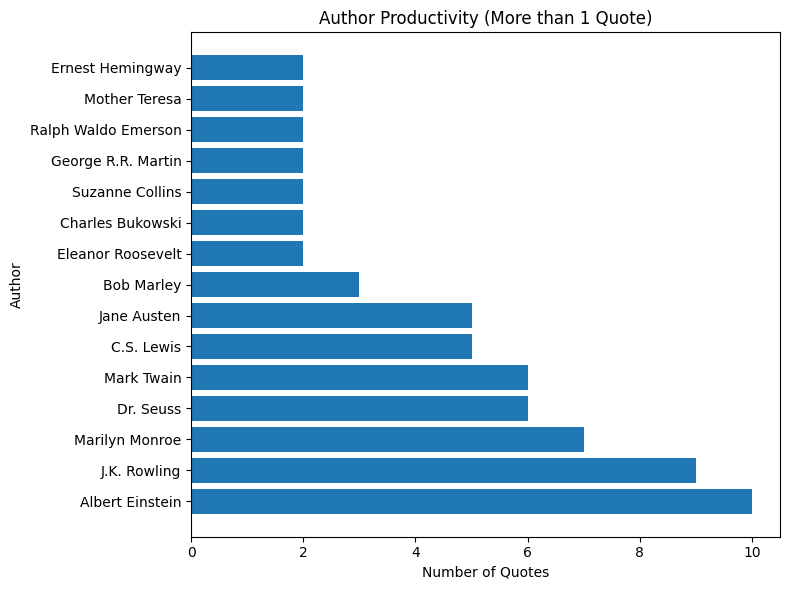

In [7]:
plt.figure(figsize=(8, 6))
plt.barh(authors_with_multiple_quotes['author'], authors_with_multiple_quotes['no_of_quotes']) 
plt.xlabel("Number of Quotes")  
plt.ylabel("Author") 
plt.title("Author Productivity (More than 1 Quote)")
plt.tight_layout()
plt.show()

### Data Visualization - Pie Chart

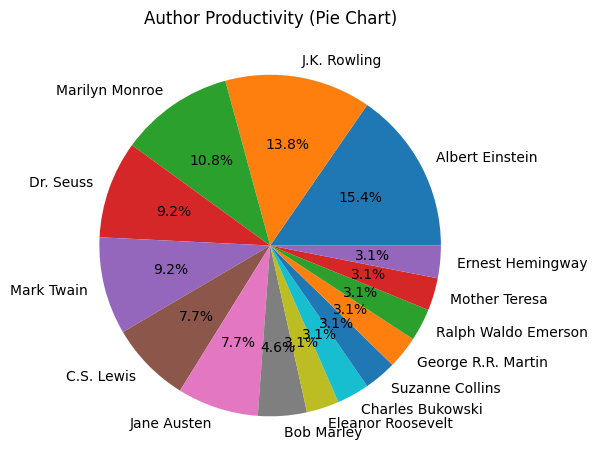

In [8]:
plt.figure(figsize=(6, 6))
plt.pie(authors_with_multiple_quotes['no_of_quotes'], labels=authors_with_multiple_quotes['author'], autopct="%1.1f%%")
plt.title("Author Productivity (Pie Chart)")
plt.tight_layout()
plt.show()

### Quote Analysis:

#### Count the total number of quotes.
#### Identify the most frequently occurring tags.
#### Analyze the length of quotes (number of characters or words).

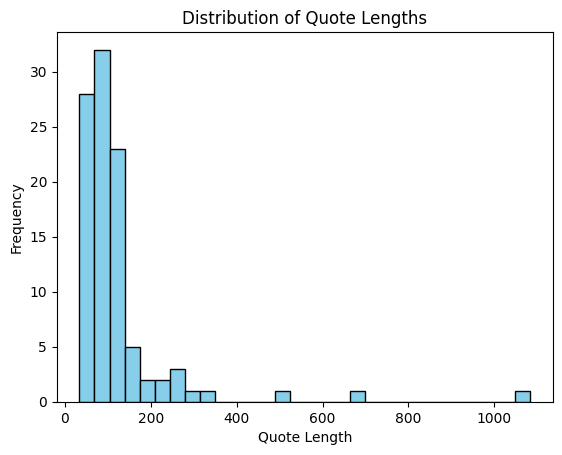

Total number of quotes: 100
Top 5 most frequent tags:
 tags
love                    4
attributed-no-source    3
inspirational           3
humor                   3
death,life              2
Name: count, dtype: int64
Average quote length (in characters): 122.27


In [9]:
# Count the total number of quotes
total_quotes = len(quotes_df)

# Identify the most frequently occurring tags
top_tags = quotes_df['tags'].str.split(', ').explode().value_counts().head(5)

# Analyze the length of quotes (number of characters or words)
quotes_df['quote_length'] = quotes_df['quote'].apply(lambda x: len(x))
average_quote_length = quotes_df['quote_length'].mean()

# Visualization
# Plotting the distribution of quote lengths
plt.hist(quotes_df['quote_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Quote Lengths')
plt.xlabel('Quote Length')
plt.ylabel('Frequency')
plt.show()

# Displaying results
print("Total number of quotes:", total_quotes)
print("Top 5 most frequent tags:\n", top_tags)
print("Average quote length (in characters):", average_quote_length)


In [10]:
quotes_df

,id,author,quote,tags,quote_length
0,1,Albert Einstein,“The world as we have created it is a process ...,"change,deep-thoughts,thinking,world",115
1,2,J.K. Rowling,"“It is our choices, Harry, that show what we t...","abilities,choices",85
2,3,Albert Einstein,“There are only two ways to live your life. On...,"inspirational,life,live,miracle,miracles",131
3,4,Jane Austen,"“The person, be it gentleman or lady, who has ...","aliteracy,books,classic,humor",104
4,5,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...","be-yourself,inspirational",111
...,...,...,...,...,...
95,96,Harper Lee,“You never really understand a person until yo...,better-life-empathy,148
96,97,Madeleine L'Engle,“You have to write the book that wants to be w...,"books,children,difficult,grown-ups,write,write...",139
97,98,Mark Twain,“Never tell the truth to people who are not wo...,truth,58
98,99,Dr. Seuss,"“A person's a person, no matter how small.”",inspirational,43


In [11]:
# Explode tags into separate rows for counting
exploded_df = quotes_df['tags'].str.split(',', expand=True).stack()
exploded_df.name = 'tags'  # Set the column name
exploded_df = exploded_df.to_frame()  # Create a DataFrame

# Count the occurrences of each tag
tag_counts = exploded_df['tags'].value_counts().reset_index(name='count')

# Sort the DataFrame by count in descending order (optional)
tag_counts = tag_counts.sort_values(by='count', ascending=False)

tag_counts

,tags,count
0,love,14
2,life,13
1,inspirational,13
3,humor,12
4,books,11
...,...,...
57,christianity,1
56,faith,1
55,sun,1
54,adventure,1


In [12]:
tag_counts.to_csv('tags.csv', index=False)  # Optionally, remove the index column
print("Tag counts saved to 'tag_counts.csv'.")

Tag counts saved to 'tag_counts.csv'.


In [13]:
import pygwalker as pyg

In [17]:
pyg.walk(authors_df)

Box(children=(HTML(value='<div id="ifr-pyg-000616379bd658bdWdgyuDpNIRXTq0wt" style="height: auto">\n    <head>…